# Robot Description Test

In [3]:
import distutils.util
import os
import subprocess
import mujoco
import time
import itertools
import numpy as np
import mediapy as media
import matplotlib.pyplot as plt
from IPython.display import clear_output
from robot_descriptions import panda_mj_description
from robot_descriptions.loaders.mujoco import load_robot_description

# More legible printing from numpy.
np.set_printoptions(precision=3, suppress=True, linewidth=100)

clear_output()

In [4]:
model = load_robot_description("a1_mj_description")

Cloning https://github.com/unitreerobotics/unitree_mujoco.git...


100%|█████████████████████████████████████| 106.0/106.0 [00:10<00:00,  9.93it/s]


In [5]:
data = mujoco.MjData(model)

""

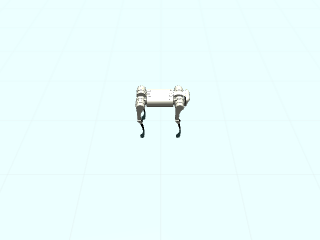

In [6]:
with mujoco.Renderer(model) as renderer:
  mujoco.mj_forward(model, data)
  renderer.update_scene(data)

  media.show_image(renderer.render())

In [7]:
# enable joint visualization option:
scene_option = mujoco.MjvOption()
scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = True

duration = 3.8  # (seconds)
framerate = 60  # (Hz)

# Simulate and display video.
frames = []
mujoco.mj_resetData(model, data)
with mujoco.Renderer(model) as renderer:
  while data.time < duration:
    mujoco.mj_step(model, data)
    if len(frames) < data.time * framerate:
      renderer.update_scene(data, scene_option=scene_option)
      pixels = renderer.render()
      frames.append(pixels)

media.show_video(frames, fps=framerate)